# <font color='palevioletred'>This notebook contains the Exploratory Data Analysis for IL-5 inducing and IL-5 non-inducing peptides in Humans. </font>
### I cover the following types of analysis to extract meaningful information from the data before proceeding for application of Machine Learning Algorithms.
1. **Peptide Length Distribution** :  To explore the general peptide length for IL-5 inducers and non-inducers.
2. **Amino-Acid Composition Analysis** : To explore the average single amino acid composition of the peptides in the IL5 inducers and IL5-non inducers
3. **Positional-preference Analysis** :  To explore the preference of particular amino acids at different positions in the IL-5 inducing peptides and non-inducing peptides by using Two-Sample Logo
4. **Motif Analysis** : To explore the exclusive motifs present in the IL-5 inducing and non-inducing peptides.
5. **Principal Component Analysis** :  To analyse the spread of the two classes in the feature space and look at possibility of reducing the dimensions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('Data/allcomp_output.csv')    # importing matrix of all the composition based features.

In [3]:
df1

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,QSO1_G_R,QSO1_G_S,QSO1_G_T,QSO1_G_V,QSO1_G_W,QSO1_G_Y,QSO1_SC1,QSO1_G1,SOC1_SC1,SOC1_G1
0,6.67,20.00,13.33,0.00,6.67,0.00,6.67,6.67,6.67,0.00,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3610,0.3610,0.4035,17303.9286
1,0.00,0.00,8.33,8.33,0.00,8.33,16.67,0.00,0.00,8.33,...,0.0000,0.0000,0.0003,0.0000,0.0000,0.0001,0.3086,0.3086,0.4057,6560.6364
2,0.00,7.14,14.29,0.00,0.00,0.00,7.14,0.00,0.00,14.29,...,0.0001,0.0001,0.0001,0.0001,0.0000,0.0000,0.3301,0.3301,0.3790,12500.1538
3,8.70,4.35,4.35,0.00,0.00,8.70,4.35,0.00,4.35,13.04,...,0.0002,0.0000,0.0001,0.0000,0.0000,0.0000,0.4485,0.4485,0.3696,11510.5000
4,8.70,4.35,4.35,0.00,0.00,8.70,4.35,0.00,4.35,13.04,...,0.0002,0.0000,0.0001,0.0000,0.0000,0.0000,0.4485,0.4485,0.3696,11510.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16670,0.00,5.00,5.00,0.00,5.00,0.00,0.00,0.00,0.00,15.00,...,0.0000,0.0003,0.0004,0.0000,0.0000,0.0000,0.2045,0.2045,0.1353,6345.3158
16671,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,30.00,...,0.0000,0.0001,0.0001,0.0000,0.0001,0.0000,0.2224,0.2224,0.1505,9836.7895
16672,20.00,0.00,0.00,0.00,5.00,10.00,0.00,5.00,0.00,20.00,...,0.0000,0.0000,0.0001,0.0000,0.0001,0.0001,0.2857,0.2857,0.2105,9402.0526
16673,0.00,0.00,6.67,6.67,6.67,20.00,13.33,6.67,0.00,13.33,...,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.3449,0.3449,0.3761,9801.2143


This matrix contains various composition based features for the peptides.These features have been generated using the Pfeatures tool(https://webs.iiitd.edu.in/raghava/pfeature/) : 
* AAC - Amino acid composition

* DPC - Dipeptide composition

* TPC - Tripeptide composition

* ABC - Atomic and bond composition

* RRI - Residue repeat Information

* DDOR - Distance distribution of residue

* SE - Shannon-entropy of protein

* SER - Shannon entropy of all amino acids

* SEP - Shannon entropy of physicochemical property

* CTD - Conjoint triad calculation of the descriptors

* CeTD - Composition-enhanced transition distribution

* PAAC - Pseudo amino acid composition

* APAAC - Amphiphilic pseudo amino acid composition

* QSO - Quasi-sequence order

* SOCN - Sequence order coupling number


In [4]:
# importing dataset with the sequence information
df2 = pd.read_csv('Data/peptide_aa_comp_df.csv', usecols=['Sequence','Qualitative_Measure']) 

In [5]:
df2['Sequence'] = df2.Sequence.str.strip()

In [6]:
df2

,Sequence,Qualitative_Measure
0,DRAHYNIVTFCCKCD,Positive
1,MHGDTPTLHEYM,Positive
2,DSTLRLCVQSTHVD,Positive
3,RNGYRALMDKSLHVGTQCALTRR,Positive
4,RNGYRALMDKSLHVGTQCALTRR,Positive
...,...,...
16776,SCSPTFSSDPLTTPPLMLTT,Negative
16777,PLPWALQTTNLPLMAMSSLL,Positive
16778,ILLLATMATAFMGYALPWGQ,Negative
16779,SHMEPSFGLILHDGG,Positive


1. **Sequence** column contains the actual peptide sequences that have been used for calculation of the above mentioned composition based features.
2. **Qualitative Measure** contains the information for whether the peptide can induce IL-5 release from CD4+ cells (Positive Assay) or not (Negative Assay) 

## Filter peptides lying outside the range of 8-25
Since Literature evidence suggests that peptides in the range of 8-25 are the most suitable for MHC antigen processing and presentation

In [7]:
filter1 = df2.Sequence.map(len) >= 8

In [8]:
filter2 = df2.Sequence.map(len) <= 25

In [9]:
df3 = df2.loc[filter1 & filter2]

In [10]:
df3

,Sequence,Qualitative_Measure
0,DRAHYNIVTFCCKCD,Positive
1,MHGDTPTLHEYM,Positive
2,DSTLRLCVQSTHVD,Positive
3,RNGYRALMDKSLHVGTQCALTRR,Positive
4,RNGYRALMDKSLHVGTQCALTRR,Positive
...,...,...
16776,SCSPTFSSDPLTTPPLMLTT,Negative
16777,PLPWALQTTNLPLMAMSSLL,Positive
16778,ILLLATMATAFMGYALPWGQ,Negative
16779,SHMEPSFGLILHDGG,Positive


In [11]:
df3.reset_index(drop=True, inplace=True) # need to reset index before concatenating

In [12]:
df = pd.concat([df3,df1], axis=1)

## Drop duplicates from the dataframe

In [13]:
df[df.duplicated()]

,Sequence,Qualitative_Measure,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,...,QSO1_G_R,QSO1_G_S,QSO1_G_T,QSO1_G_V,QSO1_G_W,QSO1_G_Y,QSO1_SC1,QSO1_G1,SOC1_SC1,SOC1_G1
4,RNGYRALMDKSLHVGTQCALTRR,Positive,8.70,4.35,4.35,0.00,0.00,8.70,4.35,0.00,...,0.0002,0.0000,0.0001,0.0000,0.0000,0.0000,0.4485,0.4485,0.3696,11510.5000
25,AGLLGVVSTVLLGGV,Negative,6.67,0.00,0.00,0.00,0.00,26.67,0.00,0.00,...,0.0000,0.0001,0.0001,0.0004,0.0000,0.0000,0.1527,0.1527,0.1287,7787.0714
26,GLAYKFVVPGAATPY,Positive,20.00,0.00,0.00,0.00,6.67,13.33,0.00,0.00,...,0.0000,0.0000,0.0001,0.0002,0.0000,0.0002,0.2287,0.2287,0.2118,6273.5000
27,HNWVNHAVPLAMKLI,Negative,13.33,0.00,0.00,0.00,0.00,0.00,13.33,6.67,...,0.0000,0.0000,0.0000,0.0002,0.0001,0.0000,0.3166,0.3166,0.3310,9103.4286
29,KYKIAGGIAGGLALL,Positive,20.00,0.00,0.00,0.00,0.00,26.67,0.00,13.33,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.2745,0.2745,0.2702,7530.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,LVRYWISAFP,Positive,10.00,0.00,0.00,0.00,10.00,0.00,0.00,10.00,...,0.0001,0.0001,0.0000,0.0001,0.0001,0.0001,0.2163,0.2163,0.3067,8554.3333
16655,HWFVTQRNFYEPQII,Positive,0.00,0.00,0.00,6.67,13.33,0.00,6.67,13.33,...,0.0001,0.0000,0.0001,0.0001,0.0001,0.0001,0.2976,0.2976,0.3026,7123.7857
16656,MEVGWYRPPFSRVVHLYRNGK,Positive,0.00,0.00,0.00,4.76,4.76,9.52,4.76,0.00,...,0.0001,0.0000,0.0000,0.0001,0.0000,0.0001,0.5074,0.5074,0.5151,10325.2500
16673,SHMEPSFGLILHDGG,Positive,0.00,0.00,6.67,6.67,6.67,20.00,13.33,6.67,...,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.3449,0.3449,0.3761,9801.2143


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.reset_index(drop = True, inplace=True)

## Our final dataframe

In [16]:
df

,Sequence,Qualitative_Measure,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,...,QSO1_G_R,QSO1_G_S,QSO1_G_T,QSO1_G_V,QSO1_G_W,QSO1_G_Y,QSO1_SC1,QSO1_G1,SOC1_SC1,SOC1_G1
0,DRAHYNIVTFCCKCD,Positive,6.67,20.00,13.33,0.00,6.67,0.00,6.67,6.67,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3610,0.3610,0.4035,17303.9286
1,MHGDTPTLHEYM,Positive,0.00,0.00,8.33,8.33,0.00,8.33,16.67,0.00,...,0.0000,0.0000,0.0003,0.0000,0.0000,0.0001,0.3086,0.3086,0.4057,6560.6364
2,DSTLRLCVQSTHVD,Positive,0.00,7.14,14.29,0.00,0.00,0.00,7.14,0.00,...,0.0001,0.0001,0.0001,0.0001,0.0000,0.0000,0.3301,0.3301,0.3790,12500.1538
3,RNGYRALMDKSLHVGTQCALTRR,Positive,8.70,4.35,4.35,0.00,0.00,8.70,4.35,0.00,...,0.0002,0.0000,0.0001,0.0000,0.0000,0.0000,0.4485,0.4485,0.3696,11510.5000
4,SYVLEGTLTAEKTTLVVKEG,Positive,5.00,0.00,0.00,15.00,0.00,10.00,0.00,0.00,...,0.0000,0.0001,0.0003,0.0002,0.0000,0.0001,0.3506,0.3506,0.2842,6816.4211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11420,AFMGYALPWGQMSFWGATVI,Negative,15.00,0.00,0.00,0.00,10.00,15.00,0.00,5.00,...,0.0000,0.0000,0.0000,0.0000,0.0001,0.0000,0.3390,0.3390,0.2699,12955.8947
11421,QKLAPISIMYQISPPLNVSL,Positive,5.00,0.00,0.00,0.00,0.00,0.00,0.00,15.00,...,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.2657,0.2657,0.1904,11019.8421
11422,SCSPTFSSDPLTTPPLMLTT,Negative,0.00,5.00,5.00,0.00,5.00,0.00,0.00,0.00,...,0.0000,0.0003,0.0004,0.0000,0.0000,0.0000,0.2045,0.2045,0.1353,6345.3158
11423,PLPWALQTTNLPLMAMSSLL,Positive,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0000,0.0001,0.0001,0.0000,0.0001,0.0000,0.2224,0.2224,0.1505,9836.7895


In [18]:
# saving the dataframe
# df.to_csv('Data/final_df.csv', index=False)

## Generating Negative and Positive Fasta sequence files

In [19]:
negatives = df.loc[df['Qualitative_Measure'] == 'Negative', 'Sequence']

In [20]:
positives = df.loc[df['Qualitative_Measure'] == 'Positive', 'Sequence']

In [67]:
#saving the negative sequences into fasta file format for future use
# with open('negatives.fasta','w') as file:
#     num = 1
#     for i in negatives:
#         line = f">{num}\n{i}"
#         num += 1
#         file.writelines(line + "\n")

In [68]:
#saving the positive sequences into fasta file format for future use
# with open('positives.fasta','w') as file:
#     num = 1
#     for i in positives:
#         line = f">{num}\n{i}"
#         num+=1
#         file.writelines(line + '\n')

## 1. Peptide length distribution

In [21]:
from collections import Counter

### 1.1 For il-5 non inducing peptides

In [23]:
ln = [len(i) for i in negatives]

In [24]:
pld_n = Counter(ln)
pld_n

Counter({15: 7928,
         16: 374,
         20: 104,
         17: 39,
         19: 14,
         12: 12,
         10: 41,
         14: 40,
         18: 13,
         13: 56,
         24: 6,
         22: 10,
         9: 27,
         11: 8,
         25: 1,
         21: 1,
         23: 2})

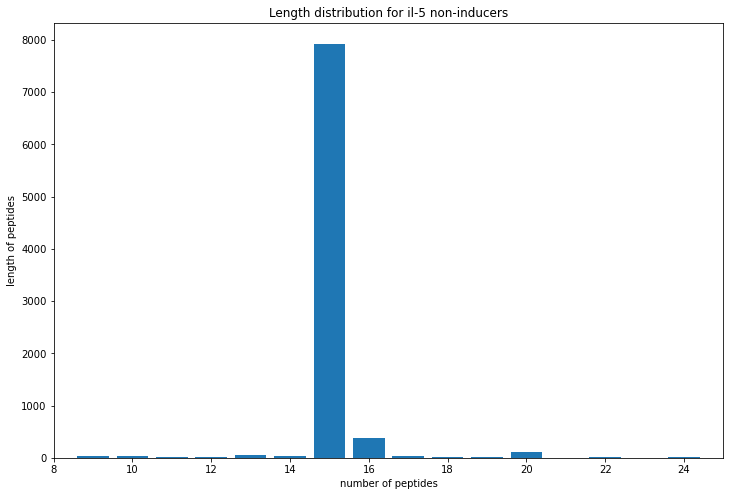

In [25]:
# peptide length distribution for il-5 non inducing peptides
plt.figure(figsize=(12,8))
plt.bar(pld_n.keys(), pld_n.values())
plt.xlim(8,25)
plt.title('Length distribution for il-5 non-inducers')
plt.xlabel('number of peptides')
plt.ylabel('length of peptides')
plt.show()

### 1.2 For il-5 inducing peptides

In [26]:
lp = [len(i) for i in positives]

pld_p = Counter(lp)
pld_p

Counter({15: 2106,
         12: 15,
         14: 30,
         23: 3,
         20: 126,
         11: 11,
         17: 32,
         16: 280,
         9: 15,
         8: 3,
         18: 28,
         21: 6,
         19: 17,
         13: 41,
         10: 17,
         25: 5,
         24: 6,
         22: 8})

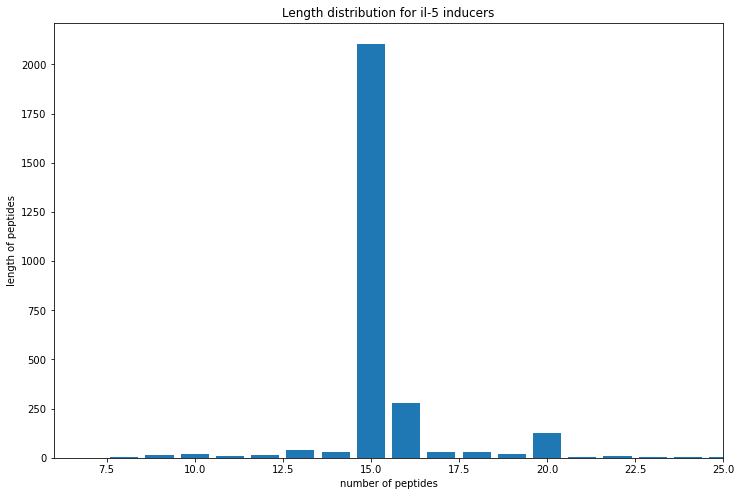

In [27]:
# peptide length distribution for il-5 inducing peptides
plt.figure(figsize=(12,8))
plt.bar(pld_p.keys(), pld_p.values())
plt.xlim(6,25)
plt.title('Length distribution for il-5 inducers')
plt.xlabel('number of peptides')
plt.ylabel('length of peptides')
plt.show()

### 1.3 For both of them together

In [28]:
# adding peptide length and number column in the df3 dataframe for plotting
df3['peptide_length'] = df3.Sequence.map(len)
df3['number'] = 1

In [29]:
df3

,Sequence,Qualitative_Measure,peptide_length,number
0,DRAHYNIVTFCCKCD,Positive,15,1
1,MHGDTPTLHEYM,Positive,12,1
2,DSTLRLCVQSTHVD,Positive,14,1
3,RNGYRALMDKSLHVGTQCALTRR,Positive,23,1
4,RNGYRALMDKSLHVGTQCALTRR,Positive,23,1
...,...,...,...,...
16670,SCSPTFSSDPLTTPPLMLTT,Negative,20,1
16671,PLPWALQTTNLPLMAMSSLL,Positive,20,1
16672,ILLLATMATAFMGYALPWGQ,Negative,20,1
16673,SHMEPSFGLILHDGG,Positive,15,1


In [30]:
df3.groupby(['Qualitative_Measure','peptide_length']).number.sum()

Qualitative_Measure  peptide_length
Negative             9                    38
                     10                   74
                     11                   32
                     12                   40
                     13                  176
                     14                  115
                     15                11861
                     16                  562
                     17                  102
                     18                   25
                     19                   37
                     20                  128
                     21                    3
                     22                   15
                     23                    6
                     24                   15
                     25                    1
Positive             8                     5
                     9                    17
                     10                   27
                     11                   13
                   

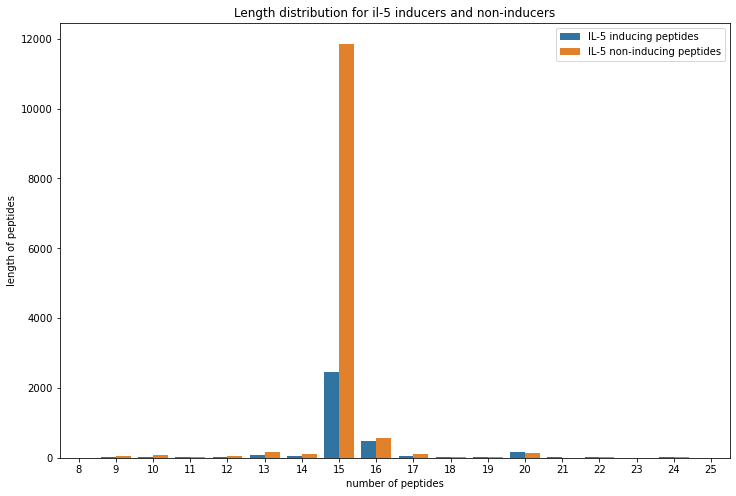

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(df3.peptide_length, hue=df3.Qualitative_Measure)
plt.legend(['IL-5 inducing peptides', 'IL-5 non-inducing peptides'])
plt.title('Length distribution for il-5 inducers and non-inducers')
plt.xlabel('number of peptides')
plt.ylabel('length of peptides')
plt.show()

So, for both il-5 inducing and il-5 non-inducing peptides we see that the peptides lie in the range of 9-25 aa in length, with majority having a length of 15 aa,however, for the il-5 non-inducing peptides, the disparity between 15 and 16 peptide length (15 aa peptides are 21x more frequent than 16 aa peptides) is larger as compared to il-5 inducing peptides(15 aa peptides are 5x more as compared to 16 aa peptides).

## 2. Amino acid composition analysis

In [33]:
# slicing chunk of df with only the amino acid composition columns
aac_df = df.loc[:,'Qualitative_Measure':'AAC_Y']

In [34]:
aac_df

,Qualitative_Measure,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,...,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,Positive,6.67,20.00,13.33,0.00,6.67,0.00,6.67,6.67,6.67,...,0.00,6.67,0.00,0.00,6.67,0.00,6.67,6.67,0.0,6.67
1,Positive,0.00,0.00,8.33,8.33,0.00,8.33,16.67,0.00,0.00,...,16.67,0.00,8.33,0.00,0.00,0.00,16.67,0.00,0.0,8.33
2,Positive,0.00,7.14,14.29,0.00,0.00,0.00,7.14,0.00,0.00,...,0.00,0.00,0.00,7.14,7.14,14.29,14.29,14.29,0.0,0.00
3,Positive,8.70,4.35,4.35,0.00,0.00,8.70,4.35,0.00,4.35,...,4.35,4.35,0.00,4.35,17.39,4.35,8.70,4.35,0.0,4.35
4,Positive,5.00,0.00,0.00,15.00,0.00,10.00,0.00,0.00,10.00,...,0.00,0.00,0.00,0.00,0.00,5.00,20.00,15.00,0.0,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11420,Negative,15.00,0.00,0.00,0.00,10.00,15.00,0.00,5.00,0.00,...,10.00,0.00,5.00,5.00,0.00,5.00,5.00,5.00,10.0,5.00
11421,Positive,5.00,0.00,0.00,0.00,0.00,0.00,0.00,15.00,5.00,...,5.00,5.00,15.00,10.00,0.00,15.00,0.00,5.00,0.0,5.00
11422,Negative,0.00,5.00,5.00,0.00,5.00,0.00,0.00,0.00,0.00,...,5.00,0.00,20.00,0.00,0.00,20.00,25.00,0.00,0.0,0.00
11423,Positive,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.00,5.00,15.00,5.00,0.00,10.00,10.00,0.00,5.0,0.00


In [35]:
aac_df.sum(axis=1)

0        100.03
1         99.99
2        100.01
3        100.03
4        100.00
          ...  
11420    100.00
11421    100.00
11422    100.00
11423    100.00
11424    100.00
Length: 11425, dtype: float64

In [36]:
# renaming the columns
aac_df.columns = ['Qualitative_Measure', 'A', 'C', 'D', 'E', 'F',
       'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P',
       'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

In [37]:
# making separate dataframes for aa composition of negative and positive peptides
aac_n = aac_df[aac_df.Qualitative_Measure == 'Negative'].drop(columns='Qualitative_Measure')
aac_p = aac_df[aac_df.Qualitative_Measure == 'Positive'].drop(columns='Qualitative_Measure')

In [38]:
aac_neg = aac_n.sum()/len(aac_n)  # taking a mean to get the average composition of each amino acid in the neg ds
aac_neg = aac_neg.round(2)
aac_neg  # average composition of each amino acid out of 100%

A     8.49
C     1.16
D     4.75
E     5.36
F     4.90
G     5.78
H     2.15
I     6.61
K     6.35
L    10.08
M     2.40
N     4.48
P     4.37
Q     3.95
R     4.38
S     6.72
T     5.51
V     7.54
W     0.99
Y     4.03
dtype: float64

In [39]:
aac_neg.sum() # as expected the total is approx. 100%

100.00000000000001

In [40]:
aac_pos = aac_p.sum()/len(aac_p)  # taking a mean to get the average composition of each amino acid in the pos ds
aac_pos = aac_pos.round(2)
aac_pos

A    7.89
C    1.32
D    4.86
E    5.20
F    5.35
G    6.06
H    2.40
I    6.78
K    6.63
L    9.85
M    2.38
N    5.19
P    4.09
Q    3.53
R    4.50
S    6.57
T    5.02
V    6.95
W    1.08
Y    4.36
dtype: float64

In [41]:
aac_pos.sum() # as expected the total is 100%

100.00999999999999

In [42]:
# making a dataframe for average amino acid composition in the neg and pos ds.
aa_comp = pd.DataFrame({'neg':aac_neg.values, 'pos':aac_pos.values}, index = aac_neg.keys())
aa_comp.index.name = 'amino_acid'

In [43]:
aa_comp['mean_diff'] = np.abs(aa_comp['neg'] - aa_comp['pos'])
aa_comp

,neg,pos,mean_diff
amino_acid,,,
A,8.49,7.89,0.60
C,1.16,1.32,0.16
D,4.75,4.86,0.11
E,5.36,5.20,0.16
F,4.90,5.35,0.45
G,5.78,6.06,0.28
H,2.15,2.40,0.25
I,6.61,6.78,0.17
K,6.35,6.63,0.28


In [44]:
# making a function to calculate p-value per amino acid 
# and return a dictionary with the keys as the amino acids and the pvals as the vals
def p_val(df1,df2):
    p_vals = {}
    for i in df1.columns:
        p_val = stats.ttest_ind(df1[i], df2[i])[1] # slicing for the p-value
        p_vals[i] = round(p_val,4)  # updating the aa name as the key and the corresponding p-value as the value
    return p_vals

In [45]:
p_vals = p_val(aac_n,aac_p)
p_vals

{'A': 0.0017,
 'C': 0.0174,
 'D': 0.3672,
 'E': 0.2372,
 'F': 0.0003,
 'G': 0.0734,
 'H': 0.0047,
 'I': 0.2488,
 'K': 0.0465,
 'L': 0.2042,
 'M': 0.8673,
 'N': 0.0,
 'P': 0.0341,
 'Q': 0.0003,
 'R': 0.3278,
 'S': 0.3262,
 'T': 0.0002,
 'V': 0.0001,
 'W': 0.1695,
 'Y': 0.0071}

In [46]:
# update the aa_comp dataframe with the column for the p-value
aa_comp['p-val'] = p_vals.values()

In [47]:
# sorting the dataframe for mean_diff in increasing order
aa_comp = aa_comp.sort_values(by='mean_diff', ascending=True)
aa_comp

,neg,pos,mean_diff,p-val
amino_acid,,,,
M,2.40,2.38,0.02,0.8673
W,0.99,1.08,0.09,0.1695
D,4.75,4.86,0.11,0.3672
R,4.38,4.50,0.12,0.3278
S,6.72,6.57,0.15,0.3262
C,1.16,1.32,0.16,0.0174
E,5.36,5.20,0.16,0.2372
I,6.61,6.78,0.17,0.2488
L,10.08,9.85,0.23,0.2042


In [48]:
# adding a greater column to set y coordinates for the bar labels.
greater = []
for i in aa_comp.index:
    negg = aa_comp.loc[i, 'neg']
    poss = aa_comp.loc[i, 'pos']
    if negg > poss:
        greater.append(negg)
    else:
        greater.append(poss)
aa_comp['greater'] = greater

In [49]:
# final amino acid composition dataframe we recieve
aa_comp

,neg,pos,mean_diff,p-val,greater
amino_acid,,,,,
M,2.40,2.38,0.02,0.8673,2.40
W,0.99,1.08,0.09,0.1695,1.08
D,4.75,4.86,0.11,0.3672,4.86
R,4.38,4.50,0.12,0.3278,4.50
S,6.72,6.57,0.15,0.3262,6.72
C,1.16,1.32,0.16,0.0174,1.32
E,5.36,5.20,0.16,0.2372,5.36
I,6.61,6.78,0.17,0.2488,6.78
L,10.08,9.85,0.23,0.2042,10.08


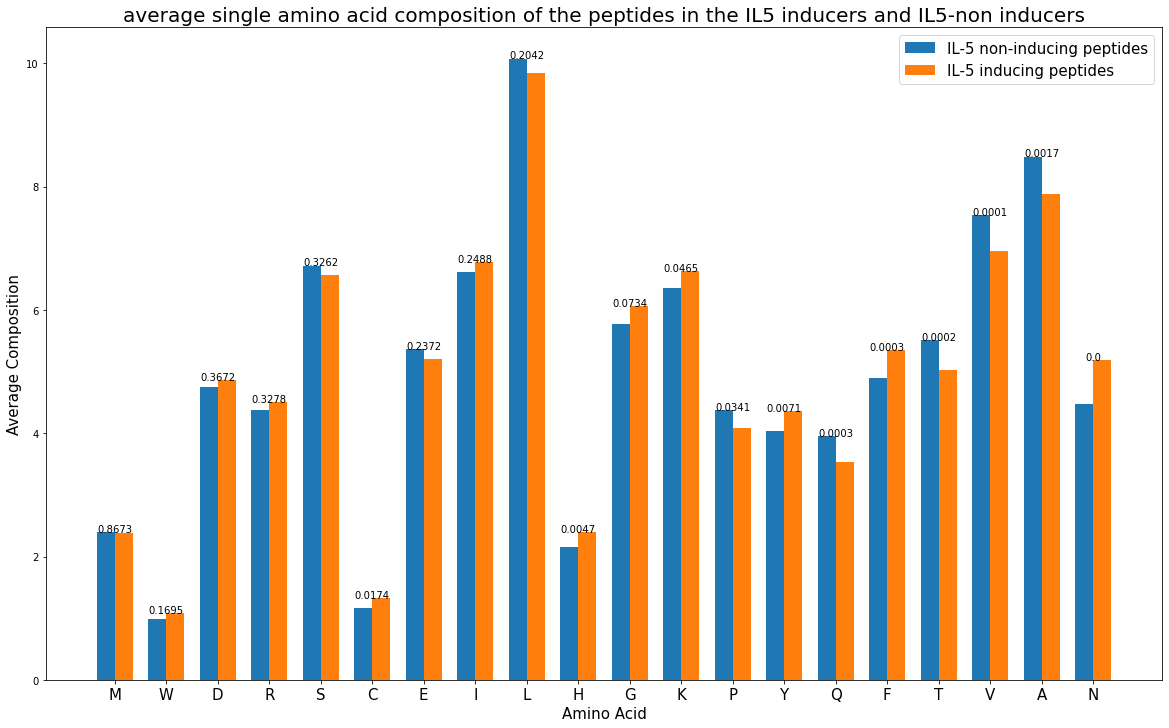

In [50]:
# Amino acid composition bar plot in increasing order of mean diff between the two groups
def addlabels(x,y,z):
    for i in range(len(x)):
        ax.text(i,z[i],y[i] , ha = 'center')  # the first position is for the x coordinate, the second for the y coordinate and then the third is for the value

labels = aa_comp.index
neg = aa_comp.neg
pos = aa_comp.pos


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,12))
rects1 = ax.bar(x - width/2, neg, width, label='IL-5 non-inducing peptides')
rects2 = ax.bar(x + width/2, pos, width, label='IL-5 inducing peptides')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Composition', fontsize=15)
ax.set_xlabel('Amino Acid', fontsize=15)
ax.set_title('average single amino acid composition of the peptides in the IL5 inducers and IL5-non inducers',
             fontsize=20)
ax.set_xticks(x, labels, fontsize=15)
ax.set_yticks(range(0,12,2))
ax.legend(fontsize=15)

addlabels(aa_comp.index, aa_comp['p-val'], aa_comp['greater'])

plt.show()

AAC analysis reveals 
* **Alanine(A), Proline(P), Glutamine(Q), Valine(V) and Threonine(T)** as the most abundant amino acids in the **il-5 non-inducing peptides**
and 
* **Cysteine(C), Lysine(K), Tyrosine(Y), Histidine(H), Phenylalanine(F), Asparagine(N)** as the most abundant amino acids in the **IL-5 inducing peptides**.
* Leucine(L) is abundant in both il-5 inducers and non-inducers.

## 3. Positional Preference Analysis 
The Amino acid composition analysis only describes the dominant residues in IL5 inducing and noninducing peptides and doesn't specify the positional preference of specific amino acid residues at specific positions in the peptides. Two sample logo analysis helps in determining the preference of a particular amino acid at different positions or at N- or C-terminals.

**Method:**
Since TSL accepts only uniform length peptides, obtained N-8 and C-8 mers for positive and negative dataset by slicing out 8 aa from N and C terminal ends of the peptides and then joined them to make a uniform list of 16 aa long peptides.

In [51]:
negatives

13            AGLLGVVSTVLLGGV
15            HNWVNHAVPLAMKLI
20            MRKLAILSVSSFLFV
22            SSVFNVVNSSIGLIM
24            KSKYKLATSVLAGLL
                 ...         
11416    ILLLATMATAFMGYVLPWGQ
11418    PLTTPPLMLTTWLLPLTIMA
11420    AFMGYALPWGQMSFWGATVI
11422    SCSPTFSSDPLTTPPLMLTT
11424    ILLLATMATAFMGYALPWGQ
Name: Sequence, Length: 8676, dtype: object

In [52]:
neg_two_sample = [i[:8] + i[-1:-9:-1] for i in negatives]

In [53]:
# #saving as a txt file to be input into tsl
# with open('Data/neg_tsl.txt','w') as file:
#     for i in neg_two_sample:
#         line = i
#         file.writelines(i+'\n')

In [54]:
positives

0                DRAHYNIVTFCCKCD
1                   MHGDTPTLHEYM
2                 DSTLRLCVQSTHVD
3        RNGYRALMDKSLHVGTQCALTRR
4           SYVLEGTLTAEKTTLVVKEG
                  ...           
11408            NFSQILPDPSKPSKR
11417     QIISPPLNVSLLLTLSILSIMA
11419       NLPLMAMSSLLLIIILALSL
11421       QKLAPISIMYQISPPLNVSL
11423       PLPWALQTTNLPLMAMSSLL
Name: Sequence, Length: 2749, dtype: object

In [55]:
pos_two_sample = [i[:8] + i[-1:-9:-1] for i in positives]

In [56]:
# with open('Data/pos_tsl.txt','w') as file:
#     for i in pos_two_sample:
#         line = i
#         file.writelines(i+'\n')

### Using Two sample Logo

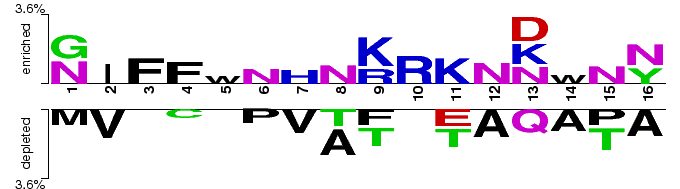

In this graph:
* The enriched portion signifies the IL-5 inducers and the depleted portion signifies the IL-5 non-inducers.
* Position 1-8 represents the N-terminal and Position 9-10 represents the C-terminal
1. **IL-5 inducers**: Pos 3 and 4 of N-terminal are abundant in Phe(F) and pos 9,10,11 of the C-terminal( technically the beginning of the C-terminal) are enriched in positively charged residues (R,K) (Particularly the C terminal is enriched in positively charged residues). In addition, IL5 inducers are also enriched in asparigine(N) at various positions of the N and C terminal (also evident from the length distribution analysis)
2. **IL-5 non-inducers** : enriched in neutral residues ; N-terminal is enriched in Met(M) at position 1, Val(V) at Pos 2 & 7. C-terminal is enriched at various positions in Ala(A) and Thr(T) (Abundance of Alanine and threonine in neg ds is also evident from amino acid composition analysis)

## 4. Motif Analysis using MERCI Software
**Used the MERCI software to mine motifs present exclusively in IL-5 inducing but not in IL-5 non-inducing peptides. Similarly, exclusive motifs were also determined for IL-5 non-inducing peptides not present in IL-5 inducing peptides.**

In [57]:
# exclusive motifs in the negative sequences i.e., IL-5 non-inducers
neg_motifs = {'APGP': 72,
'PATP': 52,
'RSP': 52,
'GAPGP': 48,
'GLPGP': 44,
'LPGP': 44,
'TEEQ': 41,
'TTEE': 41,
'QKLIE': 40,
'ADKY': 39,
'EEQK': 39,
'PADK': 39}

In [58]:
# exclusive motifs in the positive sequences i.e., IL-5 inducers.
pos_motifs = {'AATAANA':12,
'AATAANAA':12,
'DIKER':12,
'DIKERF':12,
'DIKERFA':12,
'IKER':12,
'IKERF':12,
'IKERFA':12,
'ISNP':12,
'KERF':12,
'KERFA':12,
'SDIKER':12,
'SDIKERF':12,
'SDIKERFA':12}

In [59]:
motifs_df = pd.DataFrame(data = [neg_motifs.keys(),neg_motifs.values(),pos_motifs.keys(),pos_motifs.values()]).T
motifs_df.columns = ['neg_motifs','neg_number','pos_motifs','pos_number']
motifs_df.fillna('--', inplace=True)

In [60]:
motifs_df           

,neg_motifs,neg_number,pos_motifs,pos_number
0,APGP,72,AATAANA,12
1,PATP,52,AATAANAA,12
2,RSP,52,DIKER,12
3,GAPGP,48,DIKERF,12
4,GLPGP,44,DIKERFA,12
5,LPGP,44,IKER,12
6,TEEQ,41,IKERF,12
7,TTEE,41,IKERFA,12
8,QKLIE,40,ISNP,12
9,ADKY,39,KERF,12


The motifs 'AATAANAA', 'ISNP' and 'SDIKERFA' seem to be the only unique motifs in the IL-5 inducing peptides, the others seem to be inclusive within them.

## 4. PCA Plot to look at the distribution of data points belonging to the two classes

In [61]:
df

,Sequence,Qualitative_Measure,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,...,QSO1_G_R,QSO1_G_S,QSO1_G_T,QSO1_G_V,QSO1_G_W,QSO1_G_Y,QSO1_SC1,QSO1_G1,SOC1_SC1,SOC1_G1
0,DRAHYNIVTFCCKCD,Positive,6.67,20.00,13.33,0.00,6.67,0.00,6.67,6.67,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3610,0.3610,0.4035,17303.9286
1,MHGDTPTLHEYM,Positive,0.00,0.00,8.33,8.33,0.00,8.33,16.67,0.00,...,0.0000,0.0000,0.0003,0.0000,0.0000,0.0001,0.3086,0.3086,0.4057,6560.6364
2,DSTLRLCVQSTHVD,Positive,0.00,7.14,14.29,0.00,0.00,0.00,7.14,0.00,...,0.0001,0.0001,0.0001,0.0001,0.0000,0.0000,0.3301,0.3301,0.3790,12500.1538
3,RNGYRALMDKSLHVGTQCALTRR,Positive,8.70,4.35,4.35,0.00,0.00,8.70,4.35,0.00,...,0.0002,0.0000,0.0001,0.0000,0.0000,0.0000,0.4485,0.4485,0.3696,11510.5000
4,SYVLEGTLTAEKTTLVVKEG,Positive,5.00,0.00,0.00,15.00,0.00,10.00,0.00,0.00,...,0.0000,0.0001,0.0003,0.0002,0.0000,0.0001,0.3506,0.3506,0.2842,6816.4211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11420,AFMGYALPWGQMSFWGATVI,Negative,15.00,0.00,0.00,0.00,10.00,15.00,0.00,5.00,...,0.0000,0.0000,0.0000,0.0000,0.0001,0.0000,0.3390,0.3390,0.2699,12955.8947
11421,QKLAPISIMYQISPPLNVSL,Positive,5.00,0.00,0.00,0.00,0.00,0.00,0.00,15.00,...,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.2657,0.2657,0.1904,11019.8421
11422,SCSPTFSSDPLTTPPLMLTT,Negative,0.00,5.00,5.00,0.00,5.00,0.00,0.00,0.00,...,0.0000,0.0003,0.0004,0.0000,0.0000,0.0000,0.2045,0.2045,0.1353,6345.3158
11423,PLPWALQTTNLPLMAMSSLL,Positive,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0000,0.0001,0.0001,0.0000,0.0001,0.0000,0.2224,0.2224,0.1505,9836.7895


In [62]:
temp = df

X = temp.drop(columns=['Sequence','Qualitative_Measure'])
y = temp['Qualitative_Measure']

In [63]:
scaler = StandardScaler()

In [64]:
X_scaled = scaler.fit_transform(X)

In [58]:
pca = PCA(n_components=9189)

X_pca = pca.fit_transform(X_scaled)

In [59]:
np.cumsum(pca.explained_variance_ratio_)

array([0.00893799, 0.01457869, 0.01936937, ..., 1.        , 1.        ,
       1.        ])

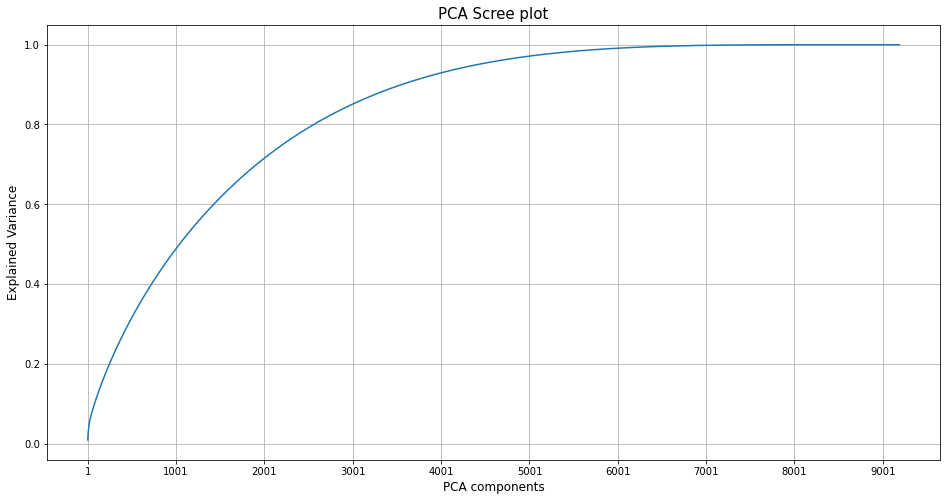

In [79]:
# scree plot
plt.figure(figsize=(16,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(0,10000,1000), labels=range(1,10000,1000))
plt.xlabel('PCA components',fontsize=12)
plt.ylabel('Explained Variance',fontsize=12)
plt.title('PCA Scree plot', fontsize=15)
plt.grid()

From this cumsum explained variance ratio plot we can clearly see that around 6000 features out of the total 9189 features are able to explain 100% of the data and so according to PCA, this is how much we can reduce the dimensionality of the data without losing much variance or information.

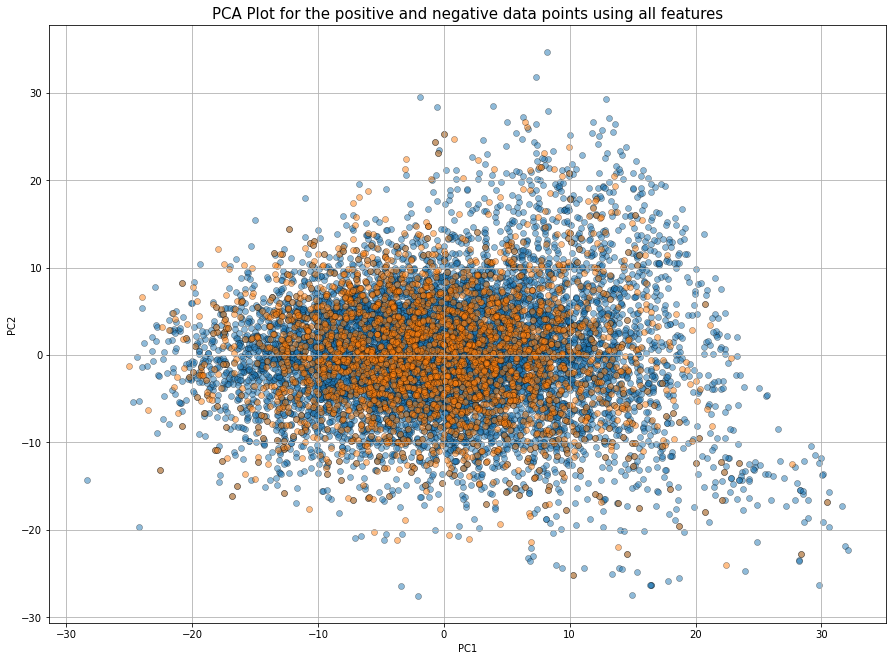

In [80]:
plt.figure(figsize=(15,11))
plt.scatter(X_pca[:,0][y[y == 'Negative'].index], X_pca[:,1][y[y == 'Negative'].index], label = 'Negative', alpha=0.5, linewidth=0.5, edgecolors='k')
plt.scatter(X_pca[:,0][y[y == 'Positive'].index], X_pca[:,1][y[y == 'Positive'].index], label = 'Positive', alpha=0.5, linewidth=0.5, edgecolors='k')
plt.title('PCA Plot for the positive and negative data points using all features', fontsize=15)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

We can observe that the positive(IL-5 inducers) and the negative class(IL-5 non-inducers) datapoints have overlapping distributions in the feature space.

### do the same thing for data with only the important 1989 features selected using Recursive Feature Elimination

In [82]:
# the features to drop
with open('Data/features-to-drop_.txt', 'r') as file:
    lines = [line for line in [line.replace('\n','') for line in file.readlines()]]

In [89]:
temp = df.drop(columns=lines)

X = temp.drop(columns=['Sequence','Qualitative_Measure'])
y = temp['Qualitative_Measure']

In [91]:
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=1089)

X_pca = pca.fit_transform(X_scaled)

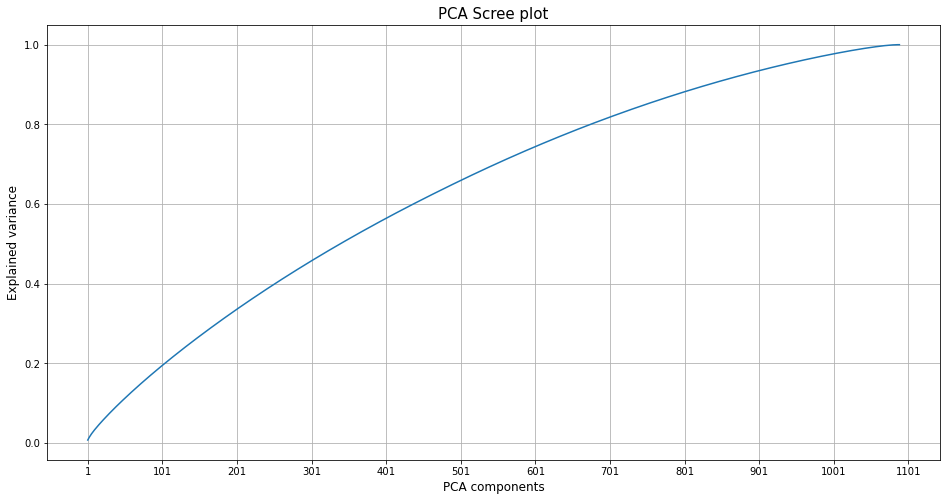

In [93]:
plt.figure(figsize=(16,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(0,1102,100), labels=range(1,1102,100))
plt.xlabel('PCA components',fontsize=12)
plt.ylabel('Explained variance',fontsize=12)
plt.title('PCA Scree plot', fontsize=15)
plt.grid()

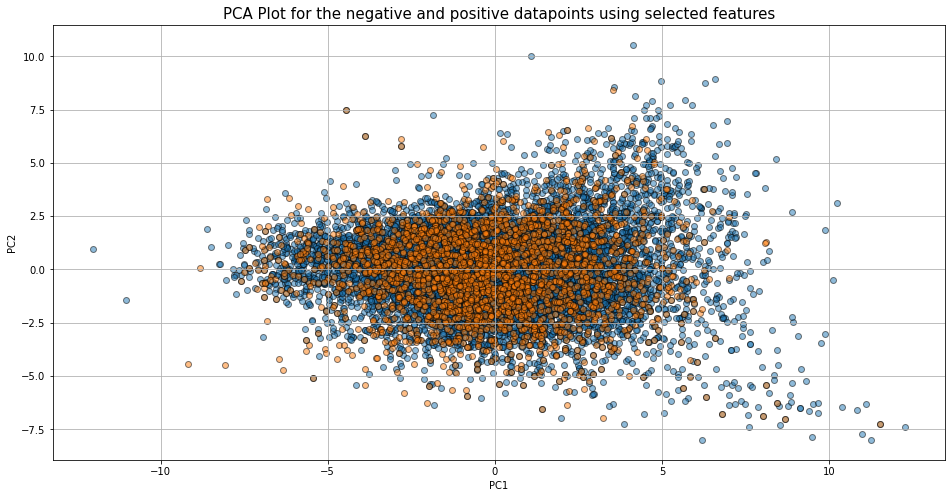

In [94]:
plt.figure(figsize=(16,8))

plt.scatter(X_pca[y[y=='Negative'].index, 0], X_pca[y[y=='Negative'].index, 1], label='Negative', alpha=0.5, edgecolors='k')
plt.scatter(X_pca[y[y=='Positive'].index, 0], X_pca[y[y=='Positive'].index, 1], label='Positive', alpha=0.5, edgecolors='k')
plt.title('PCA Plot for the negative and positive datapoints using selected features', fontsize=15)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()

Even after having selected "important" features using Recursive Feature elimination, we still donot see much difference in the distribution of the data points of the two classes. This means that the features that have been selected weren't actually important. This is because for the IL-5 inducing or non-inducing peptides, none of the 9189 composition based features seem to be bear distinguishing information, and RFE selects features on the basis of those which give good performance on the training set, and thus overfits.

Hence, this dataset isn't ideal to be input into a Machine Learning Algorithm, I shall prove this in a coming up notebook.